# Class Imbalance

In [23]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data_file_path = "../data/clean_fer_2013/"

## Is there still Class Imbalance in the clean dataset?

In the preprocessing step, I removed duplicates and poor quality images. This reduced the training dataset from 28,709 images to 26,767 images.

We can see that removing images has retained the general distribution i.e. that there are far more "happy" images than "disgust" images. Unfortunately our preprocessing has accentuated the difference, but only very slightly.


In [75]:
def get_meta_train(training_data_path):
    """
    Retrieve basic information about training images

    Args:
        training_data_path: (str) path to the training folder containing all training images
        
    Returns:
        list of dictionaries, each containing metadata about the image
    
    """
    file_meta = []
    

    for name in os.listdir(training_data_path): 
        filepath = os.path.join(training_data_path, name)

        if '.DS_Store' in filepath:
            continue

        for image_file_name in os.listdir(filepath): 
            image_filepath = os.path.join(filepath, image_file_name)
        
            stats = os.stat(image_filepath)
            with Image.open(image_filepath) as img:
                width, height = img.size
    
                mode = img.mode
                
                attrs = {
                    'category': name,
                    'file_name': image_file_name,
                    'file_path': image_filepath,
                }
                file_meta.append(attrs)
    
    return file_meta 

In [76]:
train_data_folder = data_file_path + "train/"

meta_train = get_meta_train(train_data_folder)

df_meta_train = pd.DataFrame(meta_train)
df_meta_train.head(2)

,category,file_name,file_path
0,happy,Training_50449107.jpg,../data/clean_fer_2013/train/happy/Training_50...
1,happy,Training_70433018.jpg,../data/clean_fer_2013/train/happy/Training_70...


In [77]:
len(df_meta_train)

26767

In [78]:
original_data_folder = "../data/fer_2013/train"
meta_original = get_meta_train(original_data_folder)

df_meta_original = pd.DataFrame(meta_original)
len(df_meta_original)

28709

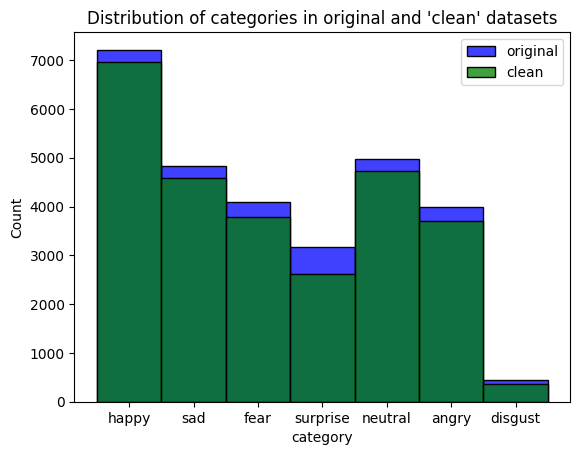

In [79]:
sns.histplot(data=df_meta_original, x="category",color="blue", label="original" )
sns.histplot(data=df_meta_train, x="category", color="green", label="clean")

plt.legend()
plt.title("Distribution of categories in original and 'clean' datasets")
plt.show()

In [80]:
df_category_percentage = df_meta_train["category"].value_counts(normalize=True).to_frame()
df_category_percentage.columns = ['clean']
df_category_percentage["original"] = pd.Series(original_class_distribution)
df_category_percentage["diff"] = df_category_percentage["clean"] - df_category_percentage["original"]
df_category_percentage.sort_values(by="clean", ascending=False)

,clean,original,diff
category,,,
happy,0.259984,0.251315,0.008669
neutral,0.176747,0.172942,0.003805
sad,0.171144,0.168240,0.002904
fear,0.141592,0.142708,-0.001116
angry,0.138678,0.139155,-0.000477
surprise,0.097956,0.110453,-0.012497
disgust,0.013898,0.015187,-0.001289
